In [104]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [15]:
office_data = pd.read_excel(files[5])
print(office_data.columns)
office_data.columns = ['area', 'person', 'office', 'community', 'library',]
office_data.head()

Index(['地域', '転入者数（人）', '事業所数', '公民館数', '図書館数'], dtype='object')


,area,person,office,community,library
0,A,3753,7453,0,4
1,A,906,2035,19,1
2,A,698,1284,7,1
3,A,920,1778,9,1
4,A,818,1989,25,1


In [23]:
office_data.describe()

,person,office,community,library
count,44.000000,44.000000,44.000000,44.000000
mean,2020.318182,2791.704545,6.068182,1.454545
std,2450.040387,2560.774497,5.923535,1.354657
min,148.000000,379.000000,0.000000,0.000000
25%,674.500000,1322.500000,1.000000,1.000000
50%,1296.500000,1983.500000,4.000000,1.000000
75%,2256.500000,3115.000000,9.000000,2.000000
max,13016.000000,13790.000000,25.000000,7.000000


In [89]:
bins = np.array([0, 1000, 2000, 3000, 4000, 5000, 10000])
freq = office_data["office"].value_counts(bins=bins, sort=False)
hist_data = pd.DataFrame(
    {
        "階級値": (bins[:-1] + bins[1:]) / 2,
        "度数": freq.values,
        "相対度数": freq.values / freq.sum(),
        "累積度数": freq.values.cumsum(),
        "相対累積度数": freq.values.cumsum() / freq.sum(),
    },
    index=freq.index,
)
hist_data

,階級値,度数,相対度数,累積度数,相対累積度数
"(-0.001, 1000.0]",500.0,5,0.116279,5,0.116279
"(1000.0, 2000.0]",1500.0,18,0.418605,23,0.534884
"(2000.0, 3000.0]",2500.0,9,0.209302,32,0.744186
"(3000.0, 4000.0]",3500.0,4,0.093023,36,0.837209
"(4000.0, 5000.0]",4500.0,2,0.046512,38,0.883721
"(5000.0, 10000.0]",7500.0,5,0.116279,43,1.000000


<Axes: xlabel='階級値'>

<Figure size 600x300 with 0 Axes>

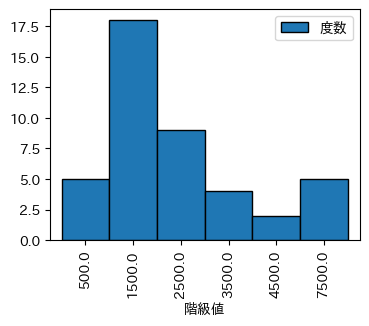

In [125]:
plt.figure(figsize=(6, 3))
hist_data.plot.bar(x='階級値', y='度数', width=1, ec='k', lw=1, figsize=(4, 3))


<Axes: >

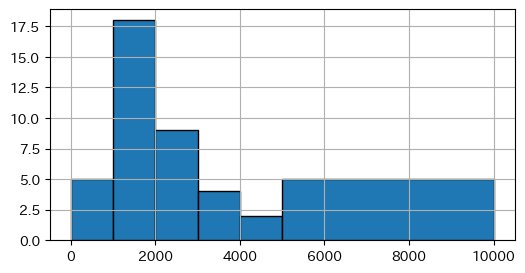

In [122]:
plt.figure(figsize=(6, 3))
office_data['office'].hist(bins=bins, ec='k', lw=1)